In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import itertools
import numpy as np
summay_dir = r"/home/lab2/shahar/cluster_dirs/vcf/hgdp/classes/summary/"
distribution_similarity_matrix =  summay_dir + 'distribution_similarity_per_class_{size}.csv'
ns_ss = 0.01
size = 1000
bins = 101
mac_min_range = 2
mac_max_range = 18
maf_min_range = 1
maf_max_range = 49
CLS2COLOR_DICT = {'mac_2': 'c', 'maf_0.01': 'b', 'maf_0.05': 'r', 'maf_0.1': 'g', 'maf_0.49': 'y'}
class_names = [f'mac_{i}' for i in range(mac_min_range, mac_max_range+1)] + [f'maf_{i / 100}' for i in range(maf_min_range, maf_max_range+1)]


0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
     ... 
61    0.0
62    0.0
63    0.0
64    0.0
65    0.0
Name: avg_1.0, Length: 66, dtype: float64


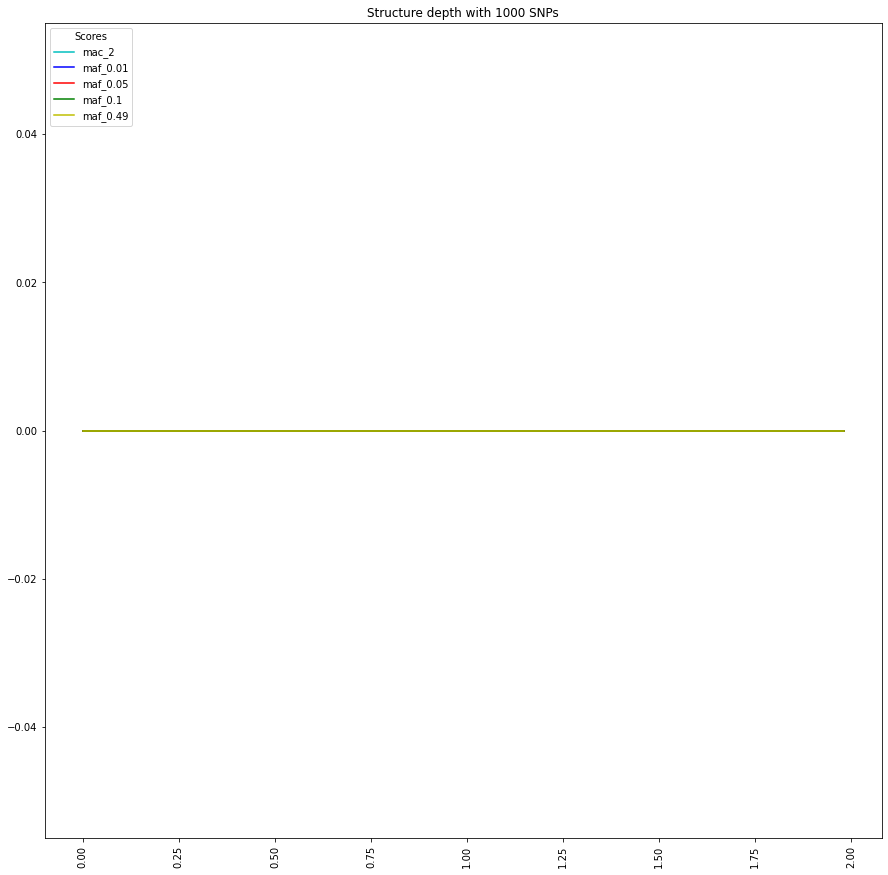

In [3]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(15)
ax = f.add_subplot(111)
path = distribution_similarity_matrix.format(size=size)
df = pd.read_csv(path)
print(df['avg_1.0'])
for cls in CLS2COLOR_DICT.keys():
    avg = [] 
    std = []
    class_values = df[df.Class == cls]
    for i in np.linspace(0, 2, 101):
        avg.append(float(class_values[f'avg_{round(i,10)}']))
        std.append(float(class_values[f'std_{round(i,10)}']))
    exit()
    avg = np.array(avg)
    std = np.array(std)
    plt.plot(np.linspace(0, 2, 101), avg, color=CLS2COLOR_DICT[cls], label=cls)
    plt.fill_between(np.linspace(0, 2, 101), y1=avg - std, y2=avg + std, alpha=0.3, color=CLS2COLOR_DICT[cls])
plt.xticks(rotation=90)
plt.legend(title="Scores", loc='upper left')
plt.title(f'Structure depth with {size} SNPs')
plt.savefig(f'{summay_dir}similarity_distribution_{size}.png')


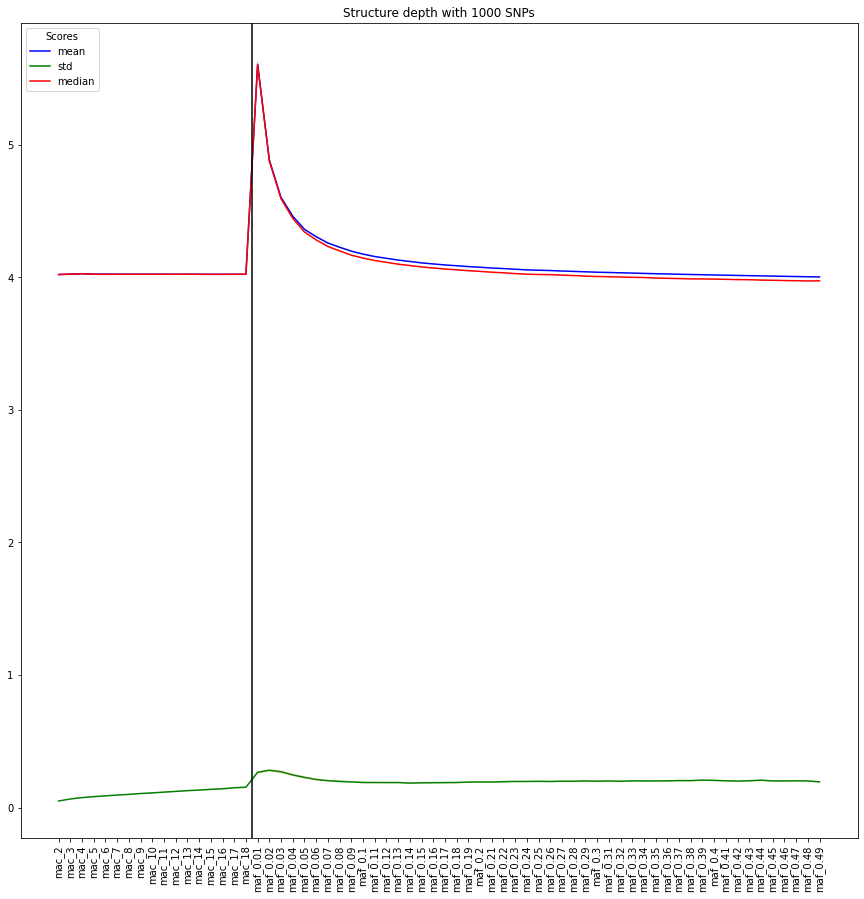

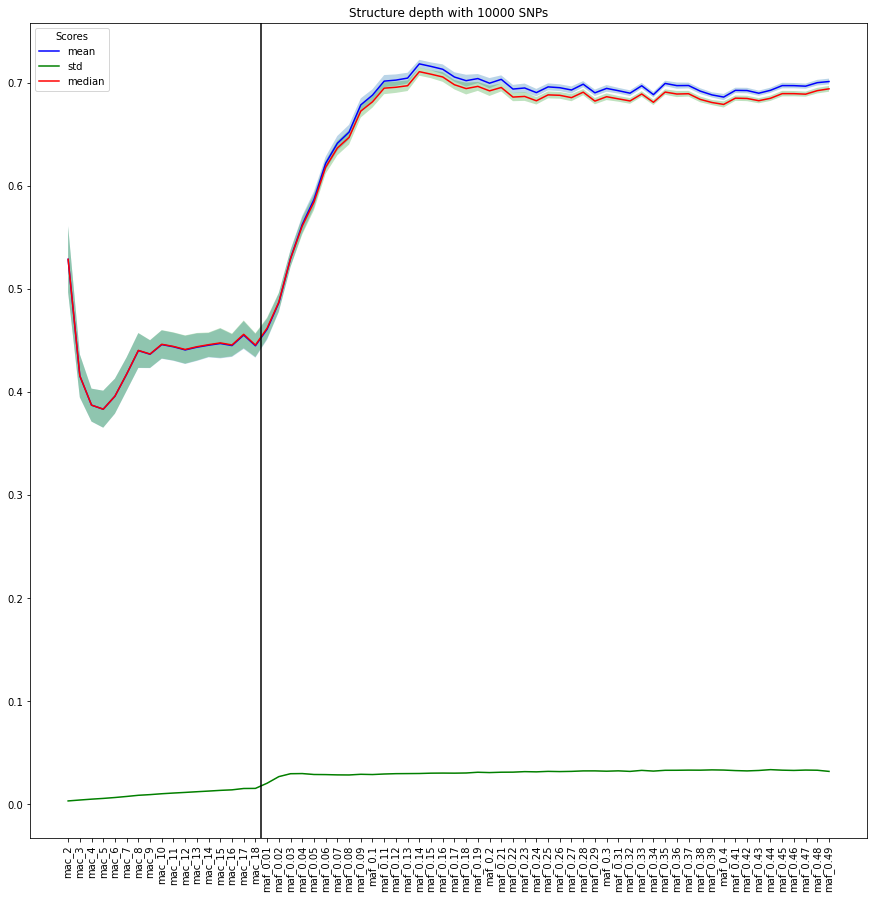

In [78]:
SCORE2COLOR_DICT = {'mean': 'b', 'std': 'g', 'median': 'r'}
for num_of_snp in [1000, 10000]:
    f = plt.figure()
    f.set_figwidth(15)
    f.set_figheight(15)
    ax = f.add_subplot(111)
    path = distribution_similarity_matrix.format(size=num_of_snp)
    df = pd.read_csv(path)
    for score in SCORE2COLOR_DICT.keys():
        avg = [] 
        std = []
        for mac_maf in ['mac', 'maf']:
            is_mac = mac_maf == 'mac'
            min_range = mac_min_range if is_mac else maf_min_range
            max_range = mac_max_range if is_mac else maf_max_range
            if min_range>0:
                for val in range(min_range, max_range+1):
                    # in maf we take 0.x
                    if not is_mac:
                        val = f'{val * 1.0/100}'
                    class_name = f'{mac_maf}_{val}'
                    class_values = df[df.Class == class_name]
                    avg.append(float(class_values[f'avg_{score}']))
                    std.append(float(class_values[f'std_{score}']))
        avg = np.array(avg)
        std = np.array(std)
        plt.plot(class_names, avg, color=SCORE2COLOR_DICT[score], label=score)
        plt.fill_between(class_names, y1=avg - std, y2=avg + std, alpha=0.3)
    plt.xticks(rotation=90)
    plt.axvline(x=16.5, color='black')
    plt.legend(title="Scores", loc='upper left')
    plt.title(f'Structure depth with {num_of_snp} SNPs')
    plt.savefig(f'{summay_dir}similarity_distribution_mean_{num_of_snp}.png')